In [1]:
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [2]:
dataset = pd.read_csv('heart.csv')
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
dataset.isnull().values.any()

False

In [6]:
dataset.duplicated().sum()

0

In [7]:
dataset.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<AxesSubplot:>

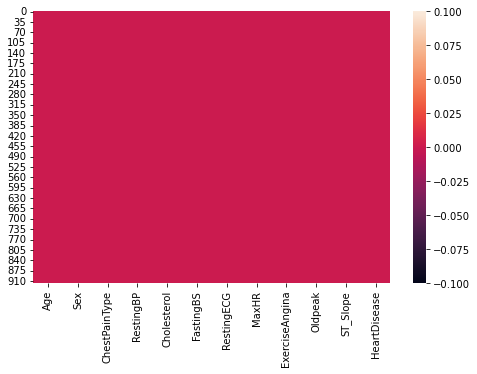

In [8]:
plt.figure(figsize=(8,5))
seaborn.heatmap(dataset.isnull())

1    508
0    410
Name: HeartDisease, dtype: int64


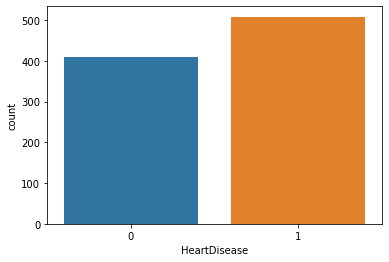

In [9]:
x = dataset['HeartDisease'].value_counts()
print(x)
seaborn.countplot(data = dataset, x = "HeartDisease")
plt.show()

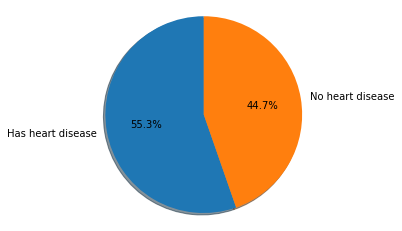

In [10]:
#visualizing in Pie chart
labels = "Has heart disease", "No heart disease"
explode = (0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(dataset.HeartDisease.value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

M    725
F    193
Name: Sex, dtype: int64


<AxesSubplot:xlabel='Sex', ylabel='count'>

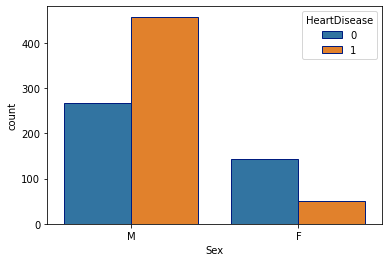

In [11]:
x = dataset['Sex'].value_counts()
print(x)
seaborn.countplot(x = 'Sex', hue = 'HeartDisease', data = dataset, edgecolor = seaborn.color_palette('dark', n_colors = 1))

In [12]:
x = dataset['ChestPainType'].value_counts()
print(x)

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64


0    704
1    214
Name: FastingBS, dtype: int64


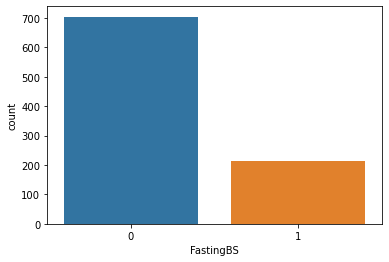

In [13]:
x = dataset['FastingBS'].value_counts()
print(x)
seaborn.countplot(data = dataset, x = "FastingBS")
plt.show()

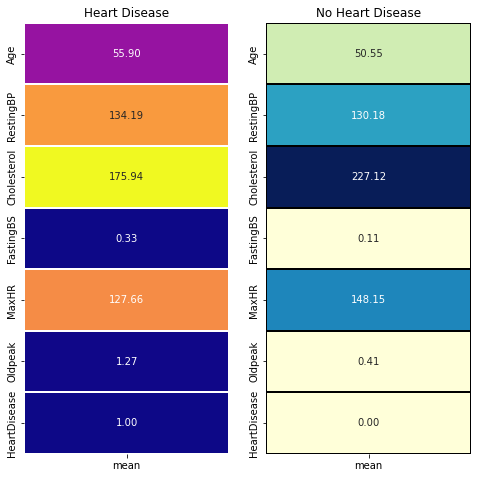

In [14]:
# Mean values of all the features for cases of heart diseases and non-heart diseases.

yes = dataset[dataset['HeartDisease'] == 1].describe().T
no = dataset[dataset['HeartDisease'] == 0].describe().T

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (7,7))
plt.subplot(1,2,1)
seaborn.heatmap(yes[['mean']],annot = True,cmap = 'plasma',linewidths = 0.4,linecolor = 'white',cbar = False,fmt = '.2f')
plt.title('Heart Disease');

plt.subplot(1,2,2)
seaborn.heatmap(no[['mean']],annot = True,cmap = 'YlGnBu',linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Heart Disease');

fig.tight_layout(pad = 2)

In [15]:
#separate cat/num data
dataset_num = dataset[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']]
dataset_cat = dataset[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope',]]

look at the distribution for all numeric variables
1 : Age
2 : RestingBP
3 : Cholesterol
4 : FastingBS
5 : MaxHR
6 : Oldpeak
7 : HeartDisease
look at the distribution for all categorical variables
1 : Sex
2 : ChestPainType
3 : RestingECG
4 : ExerciseAngina
5 : ST_Slope


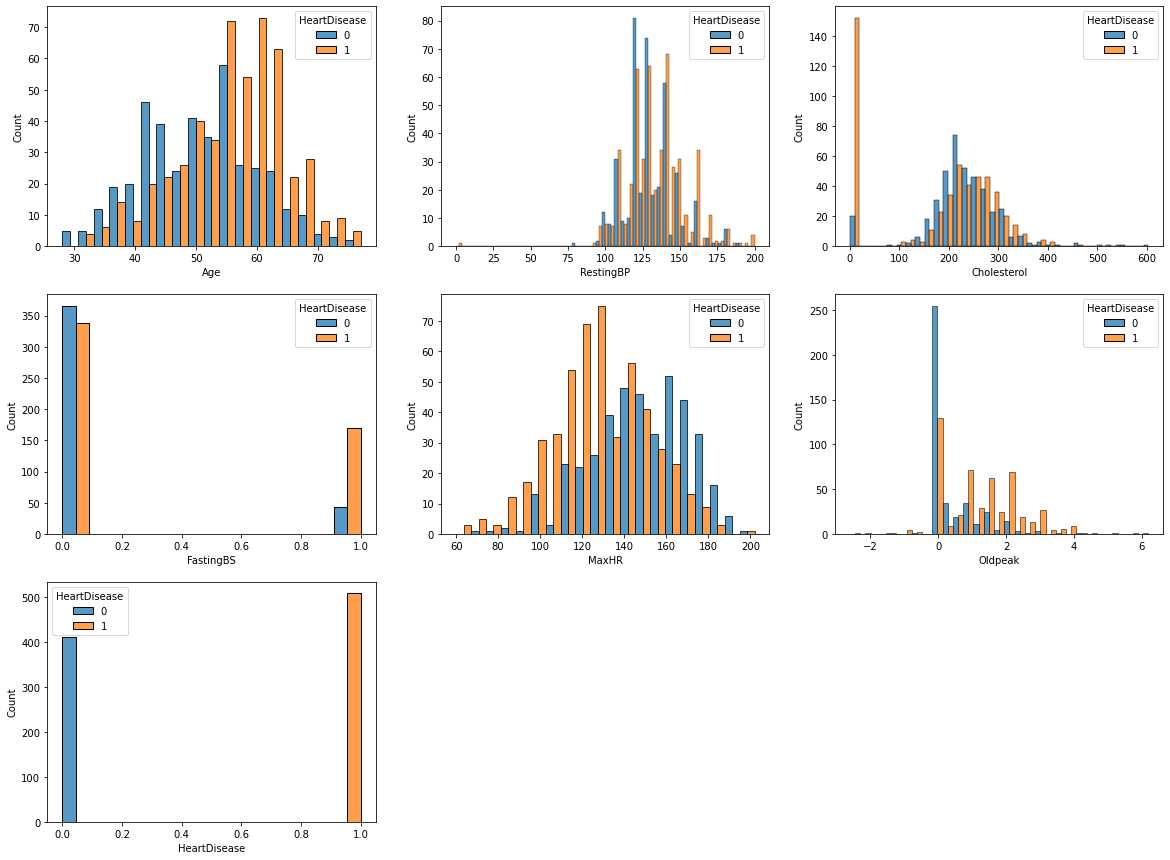

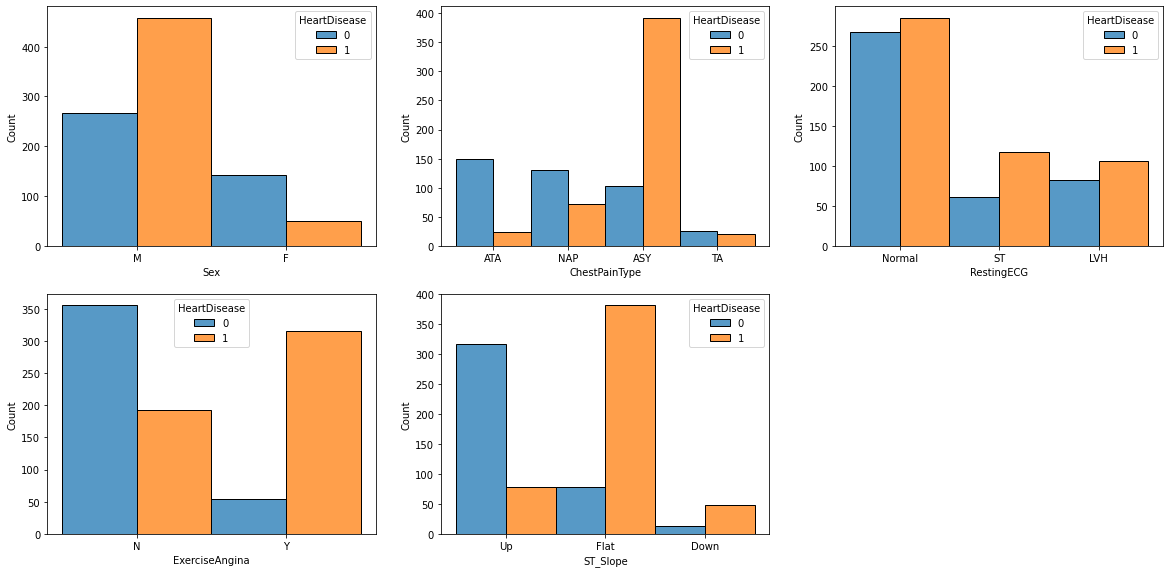

In [16]:
#look at the distribution for all numeric variables
pd.plotting.register_matplotlib_converters()

def look_at_distr(dataset_num, dataset_cat, class_feature):        
    plt.figure(figsize = [20, 15])
    counter = 0
    print('look at the distribution for all numeric variables')
    for i in dataset_num.columns:
        counter += 1
        print(counter, ':', i)
        plt.subplot(3, 3, counter)
        seaborn.histplot(data = dataset, x = dataset[str(i)], hue = dataset[class_feature], multiple  = 'dodge')
    plt.plot()

    #look at the distribution for all categ variables
    print('look at the distribution for all categorical variables')
    plt.figure(figsize = [20, 15])
    counter = 0
    for i in dataset_cat.columns:
        counter += 1
        print(counter, ':', i)
        plt.subplot(3, 3, counter)
        seaborn.histplot(data = dataset, x = dataset[str(i)], hue = dataset[class_feature], multiple  = 'dodge')
    plt.plot();
    
look_at_distr(dataset_num, dataset_cat, 'HeartDisease')

# Convert data to  numerical data 

In [17]:
lbl=LabelEncoder()
categorical=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'] 
for i in categorical:
  dataset[i]=lbl.fit_transform(dataset[i])


In [18]:
dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [19]:
dataset.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,0.781046,132.396514,198.799564,0.233115,0.989107,136.809368,0.404139,0.887364,1.361656,0.553377
std,9.432617,0.407701,0.956519,18.514154,109.384145,0.423046,0.631671,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


In [20]:
dataset.corr()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,0.055750,-0.077150,0.254399,-0.095282,0.198039,-0.007484,-0.382045,0.215793,0.258612,-0.268264,0.282039
Sex,0.055750,1.000000,-0.126559,0.005133,-0.200092,0.120076,0.071552,-0.189186,0.190664,0.105734,-0.150693,0.305445
ChestPainType,-0.077150,-0.126559,1.000000,-0.020647,0.067880,-0.073151,-0.072537,0.289123,-0.354727,-0.177377,0.213521,-0.386828
RestingBP,0.254399,0.005133,-0.020647,1.000000,0.100893,0.070193,0.022656,-0.112135,0.155101,0.164803,-0.075162,0.107589
Cholesterol,-0.095282,-0.200092,0.067880,0.100893,1.000000,-0.260974,-0.196544,0.235792,-0.034166,0.050148,0.111471,-0.232741
FastingBS,0.198039,0.120076,-0.073151,0.070193,-0.260974,1.000000,0.087050,-0.131438,0.060451,0.052698,-0.175774,0.267291
RestingECG,-0.007484,0.071552,-0.072537,0.022656,-0.196544,0.087050,1.000000,-0.179276,0.077500,-0.020438,-0.006778,0.057384
MaxHR,-0.382045,-0.189186,0.289123,-0.112135,0.235792,-0.131438,-0.179276,1.000000,-0.370425,-0.160691,0.343419,-0.400421
ExerciseAngina,0.215793,0.190664,-0.354727,0.155101,-0.034166,0.060451,0.077500,-0.370425,1.000000,0.408752,-0.428706,0.494282
Oldpeak,0.258612,0.105734,-0.177377,0.164803,0.050148,0.052698,-0.020438,-0.160691,0.408752,1.000000,-0.501921,0.403951


# Principle Component Analysis (PCA)

In [21]:
# Importing standardscalar module 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler=StandardScaler()
scaler.fit(dataset)

StandardScaler()

In [23]:
scaled_data=scaler.transform(dataset)

In [24]:
scaled_data

array([[-1.4331398 ,  0.51595242,  0.22903206, ..., -0.83243239,
         1.05211381, -1.11311472],
       [-0.47848359, -1.93816322,  1.27505906, ...,  0.10566353,
        -0.59607813,  0.89837999],
       [-1.75135854,  0.51595242,  0.22903206, ..., -0.83243239,
         1.05211381, -1.11311472],
       ...,
       [ 0.37009972,  0.51595242, -0.81699495, ...,  0.29328271,
        -0.59607813,  0.89837999],
       [ 0.37009972, -1.93816322,  0.22903206, ..., -0.83243239,
        -0.59607813,  0.89837999],
       [-1.64528563,  0.51595242,  1.27505906, ..., -0.83243239,
         1.05211381, -1.11311472]])

In [25]:
from sklearn.decomposition import PCA

In [26]:
pca=PCA(n_components=2)

In [27]:
pca.fit(scaled_data)

PCA(n_components=2)

In [28]:
x_pca=pca.transform(scaled_data)

In [29]:
scaled_data.shape

(918, 12)

In [30]:
x_pca.shape

(918, 2)

In [31]:
scaled_data

array([[-1.4331398 ,  0.51595242,  0.22903206, ..., -0.83243239,
         1.05211381, -1.11311472],
       [-0.47848359, -1.93816322,  1.27505906, ...,  0.10566353,
        -0.59607813,  0.89837999],
       [-1.75135854,  0.51595242,  0.22903206, ..., -0.83243239,
         1.05211381, -1.11311472],
       ...,
       [ 0.37009972,  0.51595242, -0.81699495, ...,  0.29328271,
        -0.59607813,  0.89837999],
       [ 0.37009972, -1.93816322,  0.22903206, ..., -0.83243239,
        -0.59607813,  0.89837999],
       [-1.64528563,  0.51595242,  1.27505906, ..., -0.83243239,
         1.05211381, -1.11311472]])

In [32]:
x_pca

array([[-2.50660494, -0.13713403],
       [-0.66665503, -1.05550187],
       [-1.50037664,  1.15382956],
       ...,
       [ 1.90098452,  0.08352633],
       [-1.12599536, -1.34844681],
       [-2.71345909,  0.51197588]])

Text(0, 0.5, 'Second principle component')

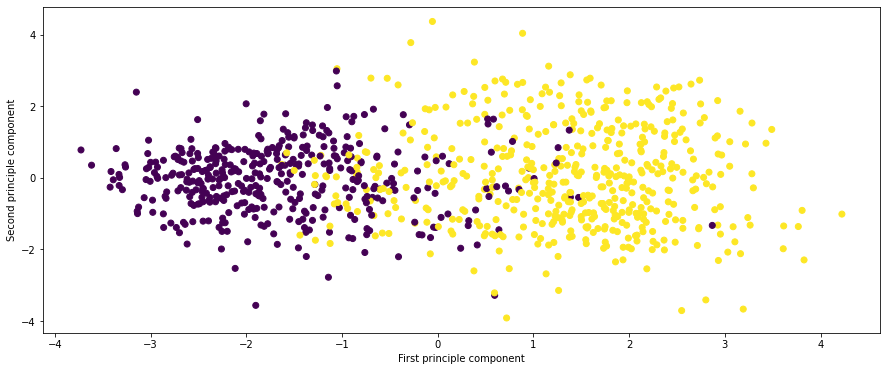

In [33]:
plt.figure(figsize=(15,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=dataset['HeartDisease'])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

In [34]:
corr = dataset.corr()

(12.5, -0.5)

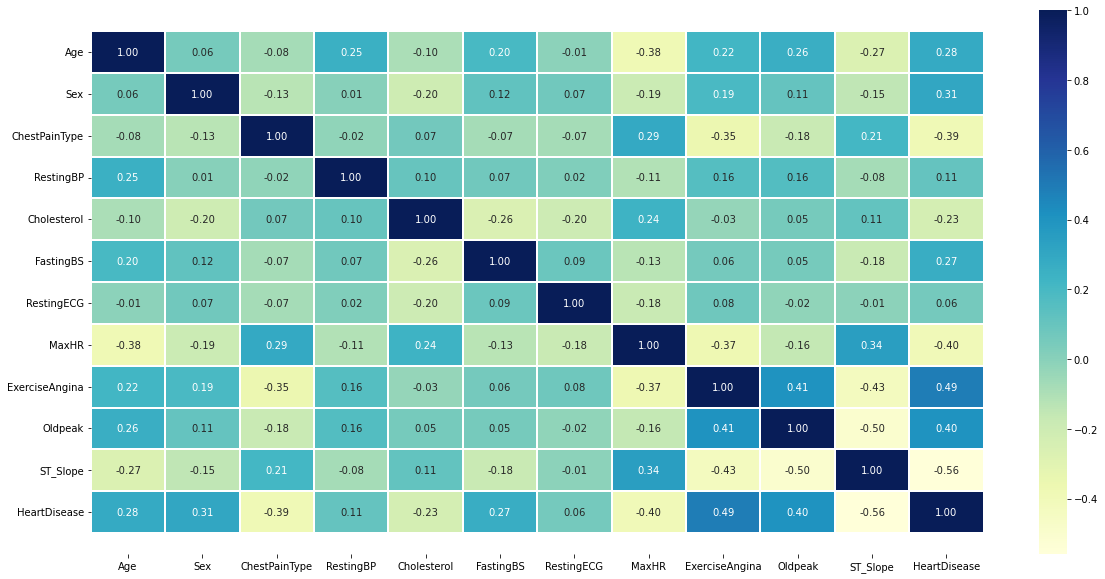

In [35]:
corr_matrix = dataset.corr()
fig, ax = plt.subplots(figsize=(20,10))
ax = seaborn.heatmap(corr_matrix,annot=True,linewidths=0.3,fmt=".2f",cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

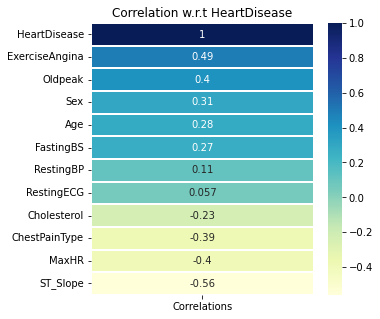

In [36]:
corr = dataset.corrwith(dataset['HeartDisease']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
seaborn.heatmap(corr,annot = True,cmap = "YlGnBu",linewidths = 0.4,linecolor = 'white');
plt.title('Correlation w.r.t HeartDisease');

In [37]:
#selecting new coloums and dataframe
myList =['Age','Sex','RestingBP', 'FastingBS','RestingECG', 'ExerciseAngina','Oldpeak']


#create a new dataframe with this list
New_dataset = dataset[myList]
print(New_dataset.shape)
New_dataset


(918, 7)


,Age,Sex,RestingBP,FastingBS,RestingECG,ExerciseAngina,Oldpeak
0,40,1,140,0,1,0,0.0
1,49,0,160,0,1,0,1.0
2,37,1,130,0,2,0,0.0
3,48,0,138,0,1,1,1.5
4,54,1,150,0,1,0,0.0
...,...,...,...,...,...,...,...
913,45,1,110,0,1,0,1.2
914,68,1,144,1,1,0,3.4
915,57,1,130,0,1,1,1.2
916,57,0,130,0,0,0,0.0


In [38]:
x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [39]:
y.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [40]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [41]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y)))

Original dataset shape Counter({0: 508, 1: 508})
Resampled dataset shape Counter({0: 508, 1: 508})


In [42]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score

In [43]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [44]:
xtrain.shape

(812, 11)

In [45]:
xtest.shape

(204, 11)

In [46]:
ytest.shape

(204,)

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

# Classify Models

In [48]:
def classify(model):
    model.fit(xtrain, ytrain)
    print("The accuracy of this model is: ", model.score(xtest, ytest)*100)
    predict = model.predict(xtest)
    print(classification_report(ytest, predict))

# Random Forest

In [79]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier()
classify(rfcl)


The accuracy of this model is:  89.2156862745098
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       107
           1       0.88      0.90      0.89        97

    accuracy                           0.89       204
   macro avg       0.89      0.89      0.89       204
weighted avg       0.89      0.89      0.89       204



Random Forest Confusion Matrix


<AxesSubplot:>

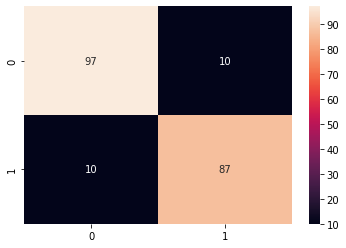

In [50]:
print('Random Forest Confusion Matrix')
y_pred = rfcl.predict(xtest)
cm = confusion_matrix(ytest, y_pred)
seaborn.heatmap(cm,annot=True)

# SVM

In [51]:
accuracies = {}
from sklearn.svm import SVC
sv = SVC()
classify(sv)
#sv.fit(xtrain, ytrain)
#print("The accuracy of SVM model is : ", sv.score(xtest, ytest)*100, "%")


The accuracy of this model is:  87.25490196078431
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       107
           1       0.87      0.86      0.86        97

    accuracy                           0.87       204
   macro avg       0.87      0.87      0.87       204
weighted avg       0.87      0.87      0.87       204



SVM Confusion Matrix


<AxesSubplot:>

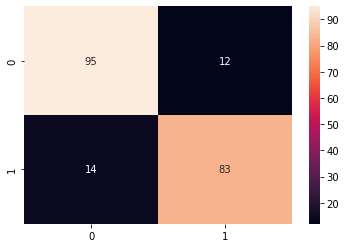

In [52]:
print('SVM Confusion Matrix')
y_pred = sv.predict(xtest)
cm = confusion_matrix(ytest,y_pred)
seaborn.heatmap(cm,annot=True)

# GaussianNB

In [53]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
classify(nb)
#nb.fit(xtrain, ytrain)
#print("The accuracy of Gaussian Naive Bayes model is : ", nb.score(xtest, ytest)*100, "%")

The accuracy of this model is:  83.82352941176471
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       107
           1       0.82      0.85      0.83        97

    accuracy                           0.84       204
   macro avg       0.84      0.84      0.84       204
weighted avg       0.84      0.84      0.84       204



GaussianNB Confusion Matrix


<AxesSubplot:>

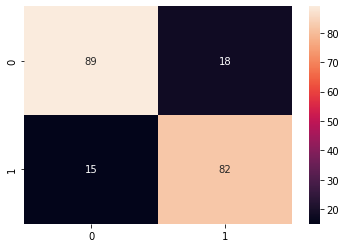

In [54]:
print('GaussianNB Confusion Matrix')
y_pred = nb.predict(xtest)
cm = confusion_matrix(ytest,y_pred)
seaborn.heatmap(cm,annot=True)

# LogisticRegression

In [55]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 1000, penalty='none')
classify(lr)
#lr.fit(xtrain, ytrain)
#print ("The accuracy of Logistic Regression is : ",  lr.score(xtest, ytest)*100, "%")

The accuracy of this model is:  85.29411764705883
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       107
           1       0.86      0.82      0.84        97

    accuracy                           0.85       204
   macro avg       0.85      0.85      0.85       204
weighted avg       0.85      0.85      0.85       204



Logistic Regression Confusion Matrix


<AxesSubplot:>

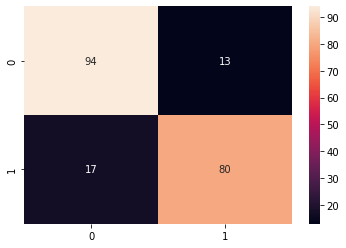

In [56]:
print('Logistic Regression Confusion Matrix')
y_pred = lr.predict(xtest)
cm = confusion_matrix(ytest,y_pred)
seaborn.heatmap(cm,annot=True)

# KNeighborsClassifier

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
classify(knn)
#knn.fit(xtrain, ytrain)
#print("The accuracy of KNN model is : ", knn.score(xtest, ytest)*100, "%")

The accuracy of this model is:  85.7843137254902
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       107
           1       0.86      0.84      0.85        97

    accuracy                           0.86       204
   macro avg       0.86      0.86      0.86       204
weighted avg       0.86      0.86      0.86       204



KNN Confusion Matrix


<AxesSubplot:>

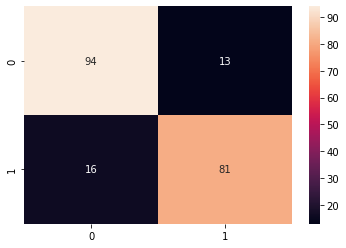

In [58]:
print('KNN Confusion Matrix')
y_pred = knn.predict(xtest)
cm = confusion_matrix(ytest,y_pred)
seaborn.heatmap(cm,annot=True)

# Decision Tree

In [59]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
bag_dt = BaggingClassifier(base_estimator=dt, n_estimators=100, bootstrap=True)
classify(bag_dt)

The accuracy of this model is:  88.23529411764706
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       107
           1       0.87      0.89      0.88        97

    accuracy                           0.88       204
   macro avg       0.88      0.88      0.88       204
weighted avg       0.88      0.88      0.88       204



Decision Tree Confusion Matrix


<AxesSubplot:>

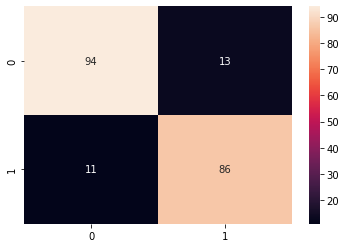

In [60]:
print('Decision Tree Confusion Matrix')
y_pred = bag_dt.predict(xtest)

cm = confusion_matrix(ytest, y_pred)
seaborn.heatmap(cm, annot=True)

# AdaBoost

In [61]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
classify(ada)

The accuracy of this model is:  84.31372549019608
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       107
           1       0.84      0.84      0.84        97

    accuracy                           0.84       204
   macro avg       0.84      0.84      0.84       204
weighted avg       0.84      0.84      0.84       204



Adaboost Confusion Matrix


<AxesSubplot:>

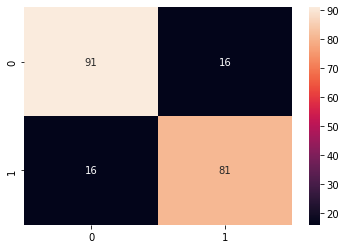

In [62]:
print('Adaboost Confusion Matrix')
y_pred = ada.predict(xtest)
cm = confusion_matrix(ytest, y_pred)
seaborn.heatmap(cm, annot=True)

# Gradient Boosting

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
classify(clf)

The accuracy of this model is:  88.23529411764706
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       107
           1       0.88      0.87      0.87        97

    accuracy                           0.88       204
   macro avg       0.88      0.88      0.88       204
weighted avg       0.88      0.88      0.88       204



Gradient Boosting Classifier Confusion Matrix


<AxesSubplot:>

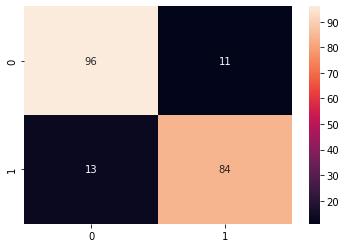

In [64]:
print('Gradient Boosting Classifier Confusion Matrix')
y_pred = clf.predict(xtest)
cm = confusion_matrix(ytest, y_pred)
seaborn.heatmap(cm,annot=True)

# Xgboost

In [65]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
classify(xgb)

The accuracy of this model is:  87.74509803921569
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       107
           1       0.88      0.87      0.87        97

    accuracy                           0.88       204
   macro avg       0.88      0.88      0.88       204
weighted avg       0.88      0.88      0.88       204



XGB Confusion Matrix


<AxesSubplot:>

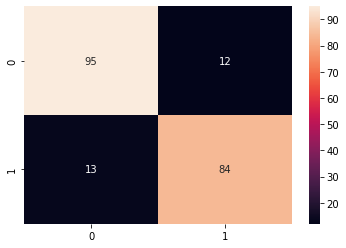

In [66]:
print('XGB Confusion Matrix')
y_pred = xgb.predict(xtest)
cm = confusion_matrix(ytest, y_pred)
seaborn.heatmap(cm,annot=True)

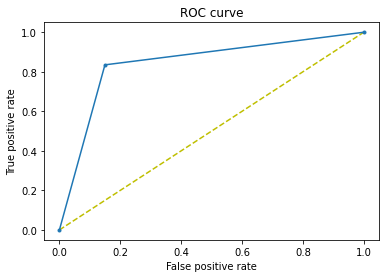

In [67]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
y_preds = ada.predict(xtest).ravel()

fpr, tpr, thresholds = roc_curve(ytest, y_preds)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'y--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

In [68]:
from sklearn.metrics import auc
auc_value = auc(fpr, tpr)
print("Area under curve, AUC = ", auc_value)

Area under curve, AUC =  0.8427594180556894


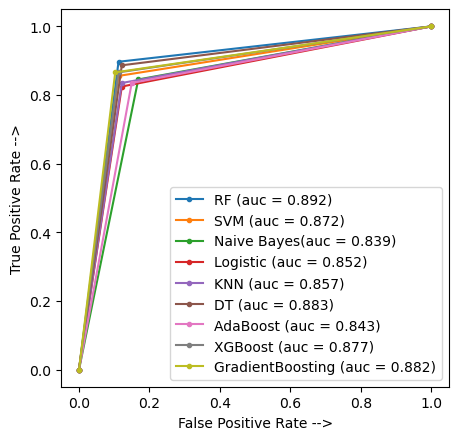

In [80]:
y_pred_rfcl = rfcl.predict(xtest).ravel()
rfcl_fpr, rfcl_tpr, threshold = roc_curve(ytest, y_pred_rfcl)
auc_rfcl = auc(rfcl_fpr, rfcl_tpr)

y_pred_svm = sv.predict(xtest).ravel()
svm_fpr, svm_tpr, threshold = roc_curve(ytest, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)


y_pred_nb = nb.predict(xtest).ravel()
nb_fpr, nb_tpr, threshold = roc_curve(ytest, y_pred_nb)
auc_nb = auc(nb_fpr, nb_tpr)

y_pred_lr = lr.predict(xtest).ravel()
lr_fpr, lr_tpr, threshold = roc_curve(ytest, y_pred_lr)
auc_logistic = auc(lr_fpr, lr_tpr)


y_pred_knn = knn.predict(xtest).ravel()
knn_fpr, knn_tpr, threshold = roc_curve(ytest, y_pred_knn)
auc_knn = auc(knn_fpr, knn_tpr)


y_pred_bag_dt = bag_dt.predict(xtest).ravel()
bag_dt_fpr,bag_dt_tpr, threshold = roc_curve(ytest, y_pred_bag_dt)
auc_bag_dt = auc(bag_dt_fpr, bag_dt_tpr)

y_pred_ada = ada.predict(xtest).ravel()
ada_fpr, ada_tpr, threshold = roc_curve(ytest, y_pred_ada)
auc_ada = auc(ada_fpr, ada_tpr)

y_pred_xgb = xgb.predict(xtest).ravel()
xgb_fpr, xgb_tpr, threshold = roc_curve(ytest, y_pred_xgb)
auc_xgb = auc(xgb_fpr, xgb_tpr)

y_pred_clf= clf.predict(xtest).ravel()
clf_fpr, clf_tpr, threshold = roc_curve(ytest, y_pred_clf)
auc_clf = auc(clf_fpr, clf_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(rfcl_fpr, rfcl_tpr, marker='.', label='RF (auc = %0.3f)' % auc_rfcl)
plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes(auc = %0.3f)' % auc_nb)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNN (auc = %0.3f)' % auc_knn)
plt.plot(bag_dt_fpr, bag_dt_tpr, marker='.', label='DT (auc = %0.3f)' % auc_bag_dt)
plt.plot(ada_fpr, ada_tpr, marker='.', label='AdaBoost (auc = %0.3f)' % auc_ada)
plt.plot(xgb_fpr, xgb_tpr, marker='.', label='XGBoost (auc = %0.3f)' % auc_xgb)
plt.plot(clf_fpr, clf_tpr, marker='.', label='GradientBoosting (auc = %0.3f)' % auc_clf)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()